In [1]:
import sys
sys.path.append('/home/alexander/Desktop/univer/BrandNewResearch')

from collections import defaultdict

from MyPackage.Models.SelkovStrogatz1D.SelkovStrogatz1DConfiguration import SelkovStrogatz1DConfiguration
from MyPackage.Models.SelkovStrogatz1D.SelkovStrogatz1DTdmaSolver import integrate_tdma_implicit_scheme, TdmaParameters1D
from MyPackage.MathHelpers.InitDataHelpers import *

from MyPackage.Drawing.DrawTransient1D import draw_transient
from MyPackage.Drawing.DrawHelper import set_defaults_1D
from MyPackage.ResearchHelpers.UsefulNotebookDrawings import draw_quadreega
from MyPackage.DataAnalyzers.PeaksAnalyzer import calc_presence
from MyPackage.DataAnalyzers.CheckResultsHelper import check_robustness
from MyPackage.DataContainers.Experiment import Experiment
from MyPackage.DataContainers.ExperimentHelper import read_experiments_from_dir

from MyPackage.DataAnalyzers.PeaksAnalyzer import calc_peaks_by_Fourier, calc_multiple_Fourier_coeffs


import pylab as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
from sklearn import preprocessing
import random

random.seed(228)


%load_ext autoreload

%autoreload 2

In [2]:
plt.rcParams['font.size'] = 16

In [3]:
aa = np.linspace(0, 0.15, 1001)
bb = np.linspace(0, 1.5, 1001)
min_a, max_a, min_b, max_b = min(aa), max(aa), min(bb), max(bb)
print(f" a in [{min_a}, {max_a}], b in [{min_b}, {max_b}]")
hopf_mins = []
hopf_maxs = []
hopf_xs = []
for a in aa:
    min_b = None
    max_b = None
    for b in bb:
        if 2* b**2 >= (-2*a) + 1 - np.sqrt(1-8*a):
            if min_b is None:
                min_b = b
        if 2* b**2 >= (-2*a) + 1 + np.sqrt(1-8*a):
            if max_b is None and min_b is not None:
                max_b = b
    if min_b is None or max_b is None or np.isnan(min_b) or np.isnan(max_b):
        continue
    hopf_xs.append(a)
    hopf_mins.append(min_b)
    hopf_maxs.append(max_b)
hopf_mins = np.array(hopf_mins)
hopf_maxs = np.array(hopf_maxs)
hopf_xs = np.array(hopf_xs)


d = 10

min_a, max_a, min_b, max_b = min(aa), max(aa), min(bb), max(bb)
print(f" a in [{min_a}, {max_a}], b in [{min_b}, {max_b}]")
turing_mins = []
turing_maxs = []
turing_xs = []
for a in aa:
    min_b = None
    max_b = None
    for b in bb:
        if d*(b**2-a) > (b**2 + a)**2 and (d*(b**2-a) - (b**2 + a)**2)**2 > 4*d*(b**2+a)**3:
            if min_b is None:
                min_b = b
        if d*(b**2-a) < (b**2 + a)**2 or (d*(b**2-a) - (b**2 + a)**2)**2 < 4*d*(b**2+a)**3:
            if max_b is None and min_b is not None:
                max_b = b
    if min_b is None or max_b is None or np.isnan(min_b) or np.isnan(max_b):
        continue
    turing_xs.append(a)
    turing_mins.append(min_b)
    turing_maxs.append(max_b)
turing_mins = np.array(turing_mins)
turing_maxs = np.array(turing_maxs)
turing_xs = np.array(turing_xs)

 a in [0.0, 0.15], b in [0.0, 1.5]


/tmp/ipykernel_23607/342489491.py:12: RuntimeWarning: invalid value encountered in sqrt
  if 2* b**2 >= (-2*a) + 1 - np.sqrt(1-8*a):
/tmp/ipykernel_23607/342489491.py:15: RuntimeWarning: invalid value encountered in sqrt
  if 2* b**2 >= (-2*a) + 1 + np.sqrt(1-8*a):


 a in [0.0, 0.15], b in [0.0, 1.5]


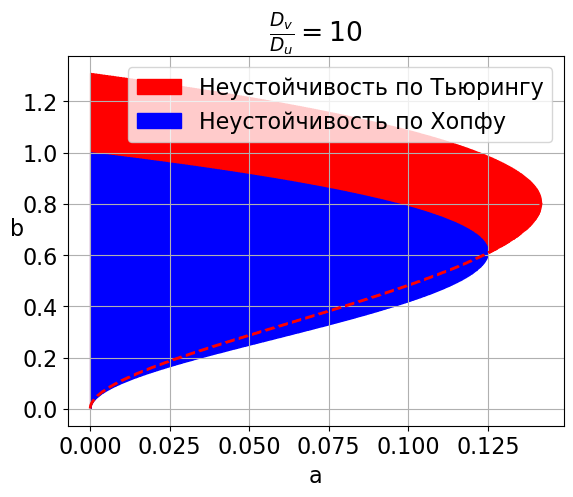

In [7]:
ax = plt.gca()

ax.fill_between(turing_xs, turing_mins, turing_maxs, color='r', label = 'Неустойчивость по Тьюрингу')
ax.fill_between(hopf_xs, hopf_mins, hopf_maxs, color='b', label = 'Неустойчивость по Хопфу')
ax.plot(turing_xs, turing_mins, ls='--', c='r', lw=2)
ax.grid()
ax.set_xlabel('a')
ax.set_ylabel('b', rotation=0)
ax.set_title('$ \\frac{D_v}{D_u} = 10$')
plt.legend()

plt.show()